# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Оглавление
1. [Общая информация о датасете](#step1)
2. [Предобработка данных](#step2)
3. [Добавление информации в таблицу](#step3)
4. [Исследовательский анализ данных](#step4)
    1. [Время продажи квартиры, общая площадь, цена, потолки и комнаты](#4.1)
    2. [Очистка от редких и выбивающихся значений](#4.1)
    3. [Определение зависимости цены от количества комнат, удаленности от центра и значения этажа](#4.1)
    4. [Зависимость цены от дня недели, месяца и года размещения объявления](#4.1)
    5. [Информация о средней цене и количестве объявлений для каждого населенного пункта](#4.1)
    6. [Зависимость цены жилья в СПб от различных факторов](#4.1)
5. [Общий вывод](#step5)

# Шаг 1. Откройте файл с данными и изучите общую информацию. <a name="step1"></a>

In [1]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
#получаем информацию о файле
df = pd.read_csv('/datasets/real_estate_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest	days_exposition    23699 non-null object
dtypes: object(1)
memory usage: 185.3+ KB


In [3]:
#выводим первые 5 строк
display(df.head())

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


In [4]:
#в предыдущем выводе был замечен разделитель, делим значения по нему
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
#получаем первые пять строк
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
#выводим описание файла
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


## Вывод

Был открыт и изучен файл с предоставленными данными.
Он имел разделитель столбцов, от которого мы избавились, явные нулевые значения, а также типы данных, которые стоит заменить для уменьшения объема используемой памяти и упрощения дальнейших расчетов.

# Шаг 2. Предобработка данных <a name="step2"></a>

In [7]:
#смотрим информацию о дубликатах
df.duplicated().sum()

0

In [8]:
#ищем столбцы с нулевыми значениями
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
#высоту потолков изменяем на медианное значение, оно выглядит реалистичным)
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [10]:
#удалили строки с пропущенными значениями этажности и названия города - их совсем мало, потери почти нулевые
df = df.dropna(subset = ['floors_total', 'locality_name']).reset_index()

In [11]:
#мы не можем удалить, либо заменить на нули жилую площадь, она нам нужна при расчетах - заполняем медианой
df['living_area'] = df['living_area'].fillna(df['living_area'].median())

In [12]:
#здесь у нас должно быть булево значение. меняем на False, так как видимо, продавцы просто не проставили 
#этот признак, типа и так очевидно
df['is_apartment'] = df['is_apartment'].fillna(value = False)

In [13]:
#мы не можем удалить, либо заменить на нули площадь кухни, она нам нужна при расчетах - заполняем медианой
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())

In [14]:
#наверное, если бы квартиры были с балконом - владельцы бы не забыли это указать
#смело меняем на 0, тем более при расчетах нам не нужна эта информация
df['balcony'] = df['balcony'].fillna(value = 0).astype('int')

In [15]:
#пропуски в количестве дней для каждого объявления тоже поменяем на медиану, дальше это будет выбросом
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median()).astype(int)

In [16]:
#можно было и не менять, но пусть цифры будут слегка меньше
df['last_price'] = df['last_price'] / 1000000

In [17]:
#меняем некорректный формат даты размещения объявления на datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

In [18]:
#пропуски заполняем -1000, потому что потом при считывании графиков проще будет найти этот выброс. 
#делим на 1000 - так из метров мы делаем км иприводим к более компактному типу int
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(value = -1000)
df['cityCenters_nearest'] = df['cityCenters_nearest']/1000
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int')

In [19]:
#возможно, все названия прописаны одинаково правильно, но для подстраховки приведем к нижнему регистру
df['locality_name'] = df['locality_name'].str.lower().astype('category')

In [20]:
#остальные столбцы, где так много пропусков, заполняем нулями - они не участвуют в расчетах совсем
for column in ['airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'floors_total']:
    df[column] = df[column].fillna(value = 0)
    df[column] = df[column].astype(int)

In [21]:
#проверяем наши данные на нули после корректировки
df.isnull().sum()

index                   0
total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [22]:
#и смотрим, успешно ли изменился тип значений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 23 columns):
index                   23565 non-null int64
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null category
airports_nearest        23565 non-null int64
cityCenters_nearest     23565 non-null int64
parks_around3000        23565 non-null int64
parks_nearest    

## Вывод:
Дубликатов в полученных значениях не найдено.
Нули были выявлены в ±60% столбцов.
Пропущенные значения высоты потолков, жилой площади, площади кухни и дней объявления мы заменили на средние значения.
Строки с пропущенными значениями количества этажей и названием населенного пункта мы исключили совсем - их количество ничтожно мало по отношению ко всему датафрейму.
Пропуски в количестве балконов были изменены на 0, видимо, в помещениях просто их нет.
Пропуски в колонке с апартаментами заменили на False, эти данные нам не понадобятся в рассчетах, как и информация о аэропортах, прудах и парках поблизости - там мы проставили 0.
Цену уменьшили в 1000000 раз, дату размещения объявления привели к формату datetime.
А вот с удаленностью от центра было сложнее. Здесь нельзя было заменить значение на среднее или медиану, поэтому мы заменили значение на -1000, в дальнейших рассчетах эта цифра превратится в -1, мы это запомним и учитывать не будем.
Все значения, где можно было ограничиться целыми числами, мы привели к типу int, а тип object для locality_name заменили на category.
Все вышеперечисленное позволило уменьшить использование памяти на 0.2МБ. Мелочь, а приятно :)

# Шаг 3. Посчитайте и добавьте в таблицу <a name="step3"></a>

In [23]:
#добавляем в таблицу значение цены за метр2
df['price_per_meter'] = df['last_price'] / df['total_area'] * 1000000

In [24]:
#добавляем столбцы с днем недели, месяцем и годом размещения объявления
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

In [25]:
#объявляем функцию, которая позволяет определить, к какому этажу относится значение floor и вызываем ее
#для добавления нового столбца с полученными значениями
def floor_num(data):
        try:
            if data['floor'] == 1:
                return 'первый'
            if data['floor'] == data['floors_total']:
                return 'последний'
            else:
                return 'другой'
        except:
            print('Некорректное значение этажа')

df['floor_num'] = df.apply((floor_num), axis = 1)

In [26]:
#добавляем столбцы с соотношением жилой площади
#и площади кухни к общей
df['living_total'] = df['living_area'] / df['total_area']
df['kitchen_total'] = df['kitchen_area'] / df['total_area']

In [27]:
#смотрим результат
print(df.head())

   index  total_images  last_price  total_area first_day_exposition  rooms  \
0      0            20      13.000       108.0           2019-03-07      3   
1      1             7       3.350        40.4           2018-12-04      1   
2      2            10       5.196        56.0           2015-08-20      2   
3      3             0      64.900       159.0           2015-07-24      3   
4      4             2      10.000       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  ...  ponds_around3000  \
0            2.70            16         51.0      8  ...                 2   
1            2.65            11         18.6      1  ...                 0   
2            2.65             5         34.3      4  ...                 2   
3            2.65            14         30.0      9  ...                 3   
4            3.03            14         32.0     13  ...                 1   

   ponds_nearest  days_exposition  price_per_meter  weekday_ex

# Шаг 4. Проведите исследовательский анализ данных и выполните инструкции: <a name="step4"></a>

##  Время продажи квартиры, общая площадь, цена, потолки и комнаты. <a name="4.1"></a>

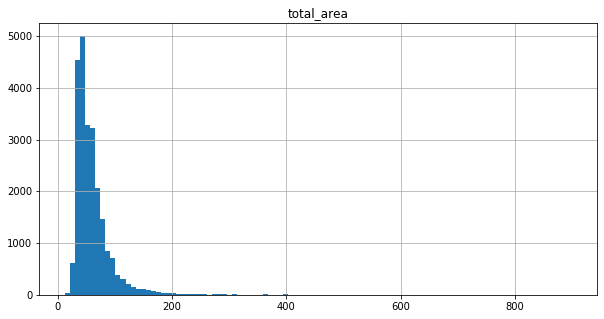

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


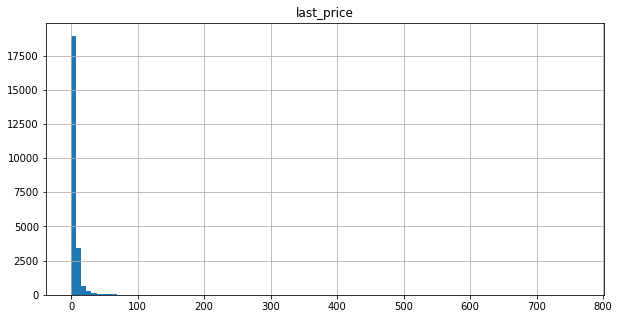

count    23565.000000
mean         6.540058
std         10.910935
min          0.012190
25%          3.400000
50%          4.646000
75%          6.790000
max        763.000000
Name: last_price, dtype: float64


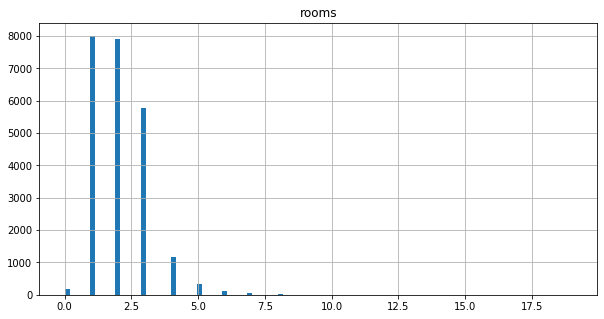

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


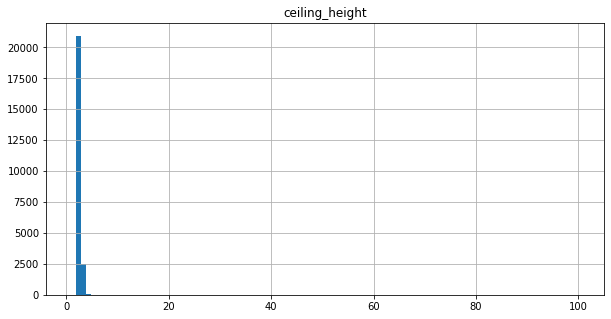

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


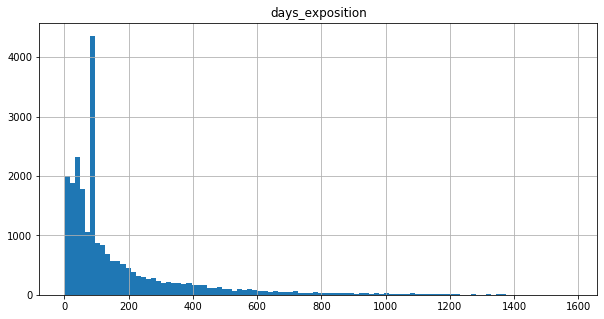

count    23565.000000
mean       169.203692
std        206.497729
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [28]:
#рисуем гистограммы и получаем описание к колонкам с общей площадью, ценой, количеством комнат,
#высотой потолков и количеством дней для объявления
for columns in df[['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']]:
    df[columns].hist(bins = 100, figsize = (10, 5), grid = True)
    plt.title(columns)
    plt.show()
    print(df[columns].describe())

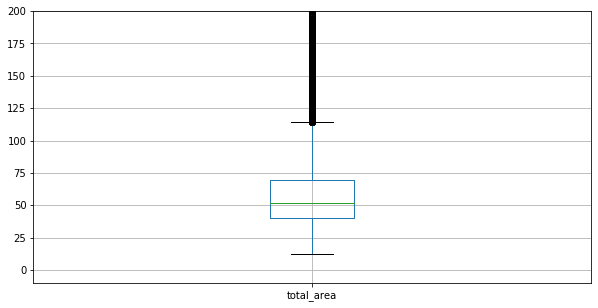

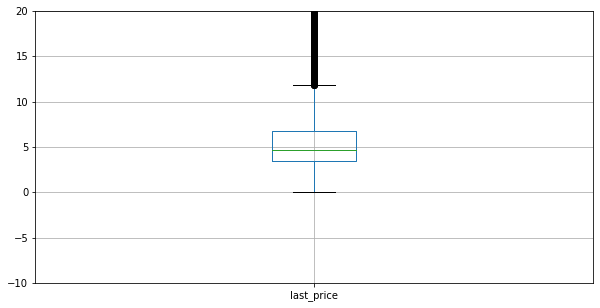

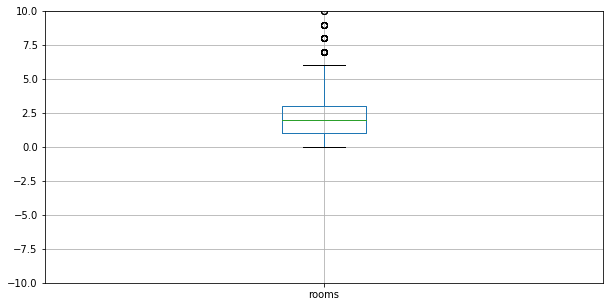

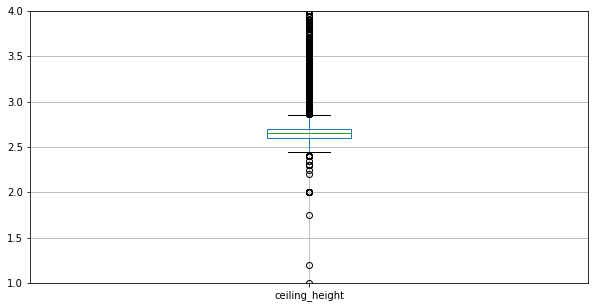

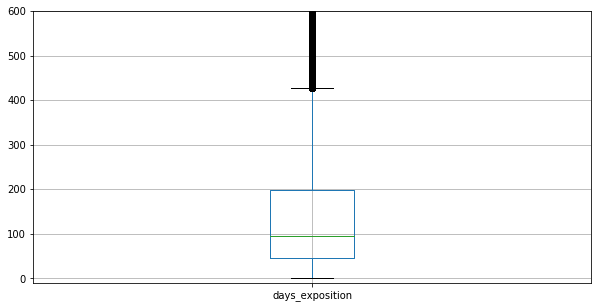

In [29]:
#для тех же столбцов отрисовываем ящики с усами
plt.figure(figsize = (10,5))
df.boxplot(column = 'total_area')
plt.ylim(-10, 200)
plt.show()

plt.figure(figsize = (10,5))
df.boxplot(column = 'last_price')
plt.ylim(-10, 20)
plt.show()

plt.figure(figsize = (10,5))
df.boxplot(column = 'rooms')
plt.ylim(-10, 10)
plt.show()

plt.figure(figsize = (10,5))
df.boxplot(column = 'ceiling_height')
plt.ylim(1, 4)
plt.show()

plt.figure(figsize = (10,5))
df.boxplot(column = 'days_exposition')
plt.ylim(-10, 600)
plt.show()

## Очистка от редких и выбивающихся значений. <a name="4.2"></a>

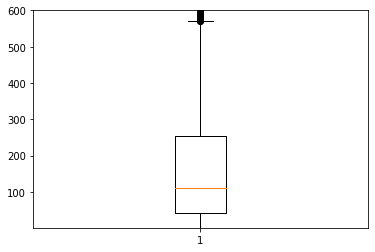

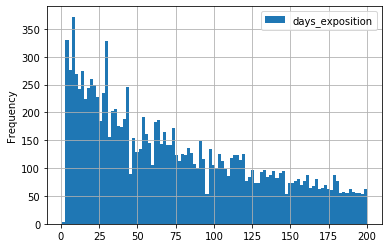

In [30]:
#на гистограмме days_exposition отчетливо видны аномалии, избавляемся от них срезом и создаем новый датафрейм
filtered_data = df.query('days_exposition != 45 and days_exposition != 95 and days_exposition != 90 and days_exposition != 60')

#отрисовываем боксплот
plt.boxplot(filtered_data['days_exposition'])
plt.ylim(1, 600)

#и гистограмму для нового датафрейма
filtered_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1, 200))


<div class="alert alert-block alert-info">
Были получены данные для площади, цены, числа комнат, высоты потолков и времени продажи квартиры.
Для каждого из значений есть потрясающие выбросы, но для площади, цены, числа комнат это объясняется легко - недвижимость бывает самая разная по этим параметрам, так что здесь все логично. А вот высота потолков колеблется в промежутке от метра до ста, хотя боксплот возвращает нас к привычным 2.5 - 2.8 метрам.

Со временем продажи квартиры все еще интереснее - есть объявления, которые остаются на сайте почти пять лет! Плюс - несколько аномалий, от которых мы избавились - 45, 60, 90 и 95 дней, что нам позволило сдвинуть медиану немного выше, но она так и осталась в районе 3-4 месяцев. Время отображения объявления на сайте - от 1 до 1580 дней. Но здесь невозможно утверждвть, что эти цифры - именно срок продажи квартиры. Это могут быть как объявления, размещенные по ошибке, так и не снятые после сделки.

Выбросы в 45, 60 и 90 дней - это вопрос к товарищам, предоставившим данные. Выброс в 95 дней - это вопрос ко мне, когда я заменила пропуски медианой :)
    </div>

## Определение зависимости цены от количества комнат, удаленности от центра и значения этажа <a name="4.3"></a>

In [31]:
#видоизменяем функцию floor - теперь с ее помощью мы добавим новый столбец, который для первого этажа дает единицу,
#для последнего - десять, для других - 5. Нам это необходимо дальше для построения матрицы рассеяния.
def floor_v2(data):
        try:
            if data['floor'] == 1:
                return 1
            if data['floor'] == data['floors_total']:
                return 10
            else:
                return 5
        except:
            print('Некорректное значение этажа')

df['floor_v2'] = df.apply((floor_v2), axis = 1)

                     price_per_meter     rooms  cityCenters_nearest  floor_v2
price_per_meter             1.000000  0.055680             0.043494  0.036814
rooms                       0.055680  1.000000            -0.056163  0.032367
cityCenters_nearest         0.043494 -0.056163             1.000000 -0.020328
floor_v2                    0.036814  0.032367            -0.020328  1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9aedafd0d0>,
      dtype=object)

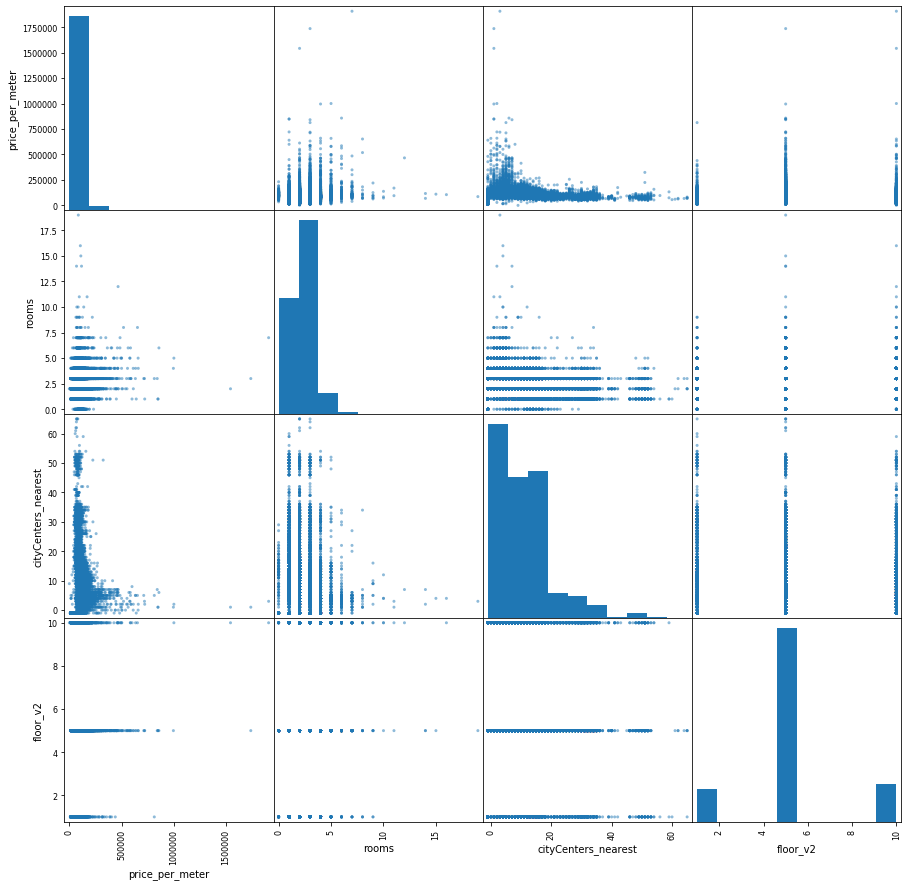

In [32]:
#матрица рассеяния для возможности определения зависимости цены от количества комнат, удаленности от центра 
#и значения этажа
corr_first = df[['price_per_meter', 'rooms', 'cityCenters_nearest', 'floor_v2']]
print(corr_first.corr())
pd.plotting.scatter_matrix(corr_first, figsize = (15, 15))

<div class="alert alert-block alert-info"> 
2-х, 3-х, 4-хкомнатные квартиры дороже других, при этом вместе с ростом числа комнат падает и цена за м2. Наверное, слишком большие квартиры - не слишком ходовой лот, который сложнее продать, вот и приходится ставить цену чуть ниже.
В центре и небольшом удалении от него цена больше, потом - снижается.
Для зависимости этажа и цены корреляция меньше, чем для предыдущих параметров, но на матрице все же видно, что первый этаж - дешевле. Для последнего этажа есть выбросы с высокой ценой - может быть, это пентхаусы в небоскребах?
    </div>

## Зависимость цены от дня недели, месяца и года размещения объявления <a name="4.4"></a>

                    price_per_meter  weekday_exposition  month_exposition  \
price_per_meter            1.000000           -0.007117         -0.001905   
weekday_exposition        -0.007117            1.000000          0.012019   
month_exposition          -0.001905            0.012019          1.000000   
year_exposition            0.008627           -0.002985         -0.271567   

                    year_exposition  
price_per_meter            0.008627  
weekday_exposition        -0.002985  
month_exposition          -0.271567  
year_exposition            1.000000  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9aedc2b9d0>,
      dtype=object)

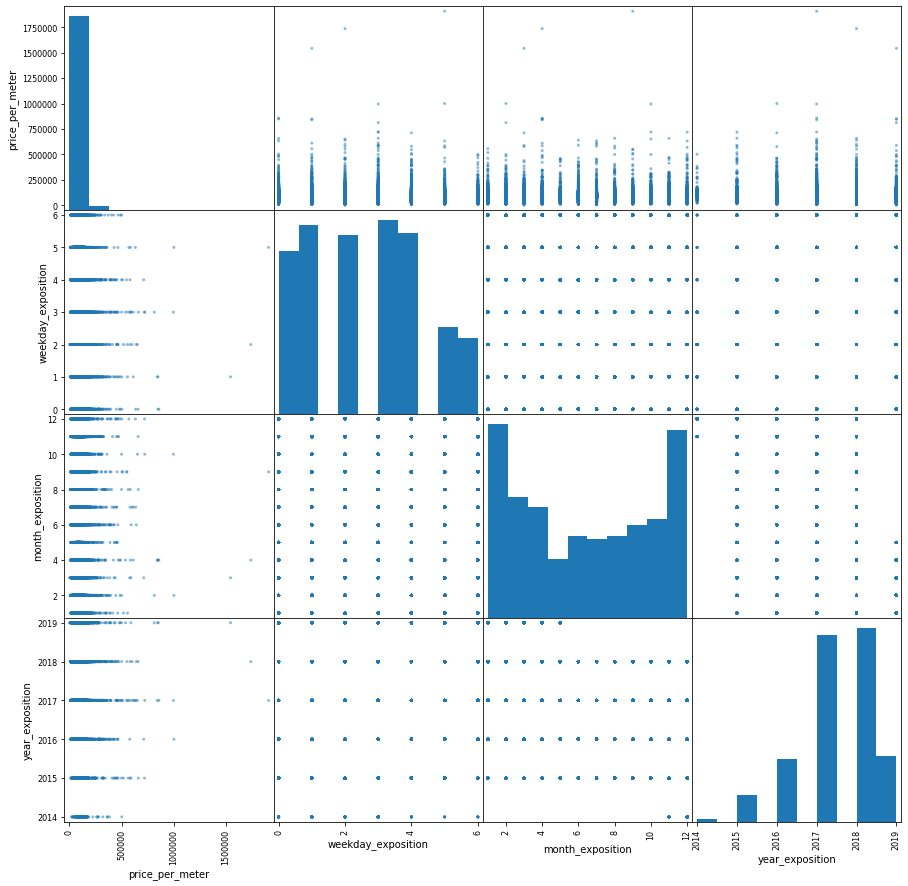

In [33]:
#еще одна матрица рассеяния - смотрим на зависимость цены от дня недели, месяца
#и года размещения объявления
corr_sec = df[['price_per_meter', 'weekday_exposition', 'month_exposition', 'year_exposition']]
print(corr_sec.corr())
pd.plotting.scatter_matrix(corr_sec, figsize = (15, 15))

<div class="alert alert-block alert-info">
По выходным цена продажи квартиры меньше, как и количество объявлений. Можно связать это с тем, что по субботам и воскресеньям люди сами выставляют квартиры на продажу, без участия агенств, и, соответственно, без наценок.
Ближе к лету падает количество объявлений - падают и цены на квартиры. В это время, видимо, люди больше задумываются о том, куда можно поехать в отпуск или о даче и сажанцах, а не о продаже квартиры.
По годам тоже есть изменения в цене - есть тенденция на увеличение стоимости к 2017 году - роль тут играет и методичное повышение платежеспособности после кризисов предыдущих лет.
    </div>

## Информация о средней цене и количестве объявлений для каждого населенного пункта <a name="4.5"></a>

In [34]:
#создаем новый датафрейм - сводную таблицу для средней цены за м2 и количества объявлений 
#для каждого населенного пункта, получаем информацию о min и max средней цене
locality_df = df.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc=['count', 'mean'])
locality_df.columns = ['count', 'mean']
print(locality_df.sort_values('count', ascending = False).head(10))
#самая высокая стоимость
print()
print('Самая высокая стоимость:')
print(locality_df[locality_df['mean'] == locality_df['mean'].max()])
#самая низкая стоимость
print()
print('Самая низкая стоимость:')
print(locality_df[locality_df['mean'] == locality_df['mean'].min()])

                   count           mean
locality_name                          
санкт-петербург    15651  114868.877341
посёлок мурино       520   85673.259928
посёлок шушары       439   78551.344545
всеволожск           398   68654.473986
пушкин               369  103125.819291
колпино              338   75424.579098
посёлок парголово    327   90175.913458
гатчина              307   68746.146763
деревня кудрово      299   92473.547576
выборг               237   58141.909153

Самая высокая стоимость:
                   count           mean
locality_name                          
посёлок лисий нос      2  121616.221359

Самая низкая стоимость:
                    count          mean
locality_name                          
деревня старополье      3  11206.221198


<div class="alert alert-block alert-info">
Самое большое количество объявлений - в Санкт-Петербурге, что вполне ожидаемо. И средняя цена за м2 соответствующая.
Интереснее было проверить, не выброс ли информация по объявлениям для послека "Лисий нос". Не выброс. Это - небольшой населенный пункт на берегу Финского залива, недалеко от КАД, застройка плотная, сплошные коттеджи. Посмотрела для сравнения Циан - там тоже цены соответствующие, до 520000 за м2.
    </div>

## Зависимость цены жилья в СПб от различных факторов <a name="4.6"></a>

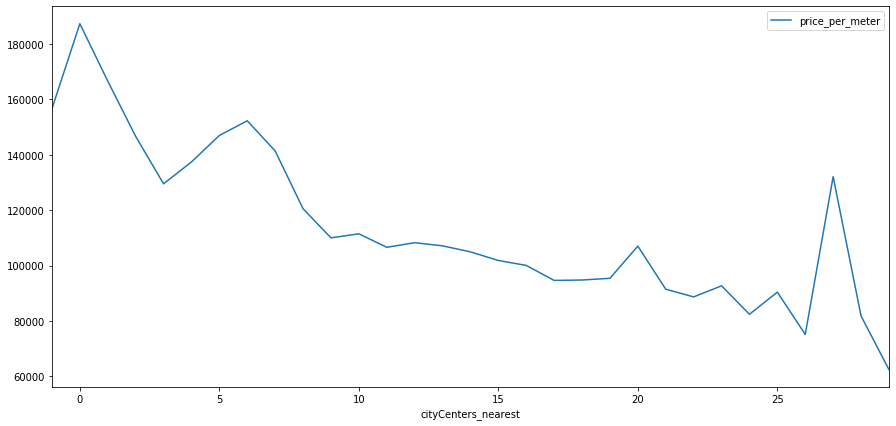

In [35]:
#получаем сводную таблицу по срезу для Санкт-Петербурга, где есть информация о удаленности от центра
#и средняя цена за м2. Помним, что при обработке были добавлены значения -1 для нулевых значений.
cityCenters_df = df.query('locality_name == "санкт-петербург"').pivot_table(index = 'cityCenters_nearest', values = 'price_per_meter', aggfunc = 'mean')
#отрисовываем график изменения цены в зависимости удаленности от центра
cityCenters_df.plot(figsize = (15, 7))

<div class="alert alert-block alert-info">
График, который показывает, как цена зависит от удалённости от центра.
Граница, где график сильно меняется - это 3. Но, зная особеннсти Петербурга (Васильевский остров - уже не центр, а он максимально близок к центру; а набережная Невы - еще центр), возьмем значение "4".
    </div>

In [36]:
#создадим новую таблицу по срезу для центра СПб
center_df = df.query('locality_name == "санкт-петербург" and cityCenters_nearest <= 4')

count    2120.000000
mean       96.526660
std        58.536084
min        12.000000
25%        61.000000
50%        83.000000
75%       114.025000
max       631.200000
Name: total_area, dtype: float64
0.20635388087275602


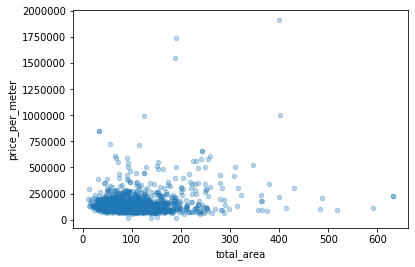

In [37]:
#отрисуем диаграмму рассеяния для зависимости цены от общей площади
print(center_df['total_area'].describe())
print(center_df['total_area'].corr(center_df['price_per_meter']))
center_df.plot(kind = 'scatter', y = 'price_per_meter', x = 'total_area', alpha = 0.3)

<div class="alert alert-block alert-info">
Средняя цена вне зависимости от площади держится в районе 100-250 тысяч рублей.
А вот значения в описании для площади ощутимо выше в СПб, чем в общем датафрейме. Например, среднее 60 м2 и медиана 52 м2 для всего датафрейма против среднего 96 м2 и медианы в 83 м2 для выборки СПб.
    </div>

-0.032009188474713395
count    2120.000000
mean        3.005660
std         1.526536
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        19.000000
Name: rooms, dtype: float64


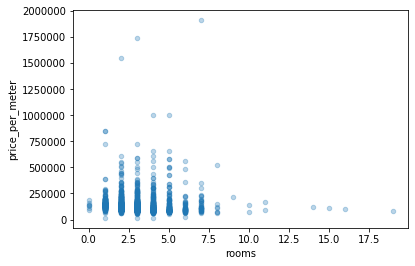

In [38]:
#отрисуем диаграмму рассеяния для зависимости цены от количества комнат
print(center_df['rooms'].corr(center_df['price_per_meter']))
print(center_df['rooms'].describe())
center_df.plot(kind = 'scatter', y = 'price_per_meter', x = 'rooms', alpha = 0.3)

<div class="alert alert-block alert-info">
Здесь на высоком уровне держатся цены для 2, 3, 4, и 5-комнатных квартир, для всей выборки - цены выше только для 2, 3, 4-комнатных.
    </div>

0.04299037194175895
count    2120.000000
mean        5.485849
std         2.554694
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: floor_v2, dtype: float64


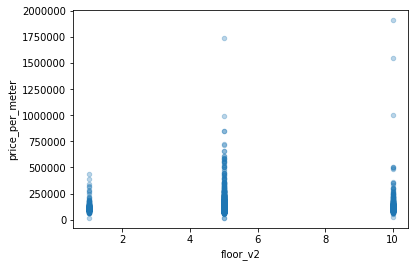

In [39]:
#отрисуем диаграмму рассеяния для зависимости цены от этажа
print(center_df['floor_v2'].corr(center_df['price_per_meter']))
print(center_df['floor_v2'].describe())
center_df.plot(kind = 'scatter', y = 'price_per_meter', x = 'floor_v2', alpha = 0.3)

<div class="alert alert-block alert-info">
Как и для общей выборки, цена для первого и последнего этажей ниже, чем для других значений. И те же выбросы для верхних этажей, что и раньше.
    </div>

-0.1127013239563489
count    2120.000000
mean        3.005660
std         1.526536
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        19.000000
Name: rooms, dtype: float64


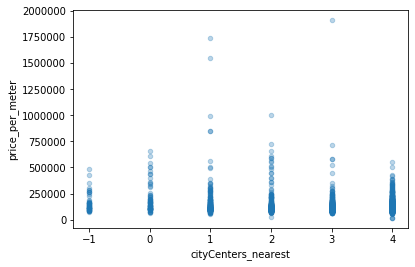

In [40]:
#отрисуем диаграмму рассеяния для зависимости цены от близости центра
print(center_df['cityCenters_nearest'].corr(center_df['price_per_meter']))
print(center_df['rooms'].describe())
center_df.plot(kind = 'scatter', y = 'price_per_meter', x = 'cityCenters_nearest', alpha = 0.3)

<div class="alert alert-block alert-info">
Видно, что чем дальше к нашей выбранной границе в 4 км - тем цена ниже.
</div>

0.029734406640950794
count    2120.00000
mean        3.01566
std         0.90396
min         2.40000
25%         2.65000
50%         3.00000
75%         3.20000
max        32.00000
Name: ceiling_height, dtype: float64


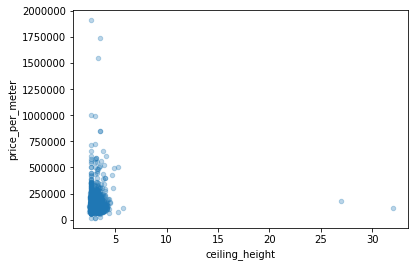

In [41]:
#отрисуем диаграмму рассеяния для зависимости цены от высоты потолков
print(center_df['ceiling_height'].corr(center_df['price_per_meter']))
print(center_df['ceiling_height'].describe())
center_df.plot(kind = 'scatter', y = 'price_per_meter', x = 'ceiling_height', alpha = 0.3)

<div class="alert alert-block alert-info">
Средняя высота потолков в центре выше, чем за его пределами, что также вплоне логично - та самая старинная застройка с высоченными потолками.
</div>

count    2120.000000
mean      227.333019
std       262.020912
min         3.000000
25%        75.000000
50%        95.000000
75%       299.000000
max      1572.000000
Name: days_exposition, dtype: float64


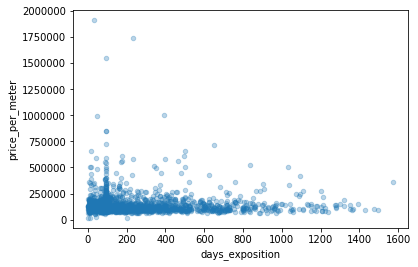

In [42]:
#отрисуем диаграмму рассеяния для зависимости цены от срока продажи
center_df['days_exposition'].corr(center_df['price_per_meter'])
print(center_df['days_exposition'].describe())
center_df.plot(kind = 'scatter', y = 'price_per_meter', x = 'days_exposition', alpha = 0.3)

<div class="alert alert-block alert-info">
И здесть тоже все ожидаемо - чем дольше квартира стоит на продаже, тем больше ей понижают цену - для того, чтобы точно продать.
</div>

# Шаг 5. Общий вывод <a name="step5"></a>

Из предоставленной нам информации можно сделать следующие выводы:
данные были достаточно "сырыми", около 60% столбцов имели пропуски значений, часть датафрейма было необходимо привести к более удобным форматам данных. Также странными оказались пропуски в тех столбцах, которые заявлены, как автоматически заполняемые системой.

Самая дорогая недвижимость со средней ценой в ±115 тысяч рублей за м2 - в Санкт-Петербурге, при этом цена ближе к центру культурной столицы постепенно растет (корреляция 0.043494), но дорогая недвижимость была обнаружена и за пределами Санкт-Петербурга со средней ценой даже выше - ±121 тысяча рублей.

Кроме того, было выявлено, что на стоимость жилья влияет: 
количество комнат (самая высокая цена - за 2-4комнатные квартиры, самая высокая выявленная корреляция в 0.055680);
площадь квартиры (бОльшая площадь уступает в цене за м2);
этаж (не первый и не последний - дороже, корреляция 0.036814);
дата размещения объявления (квартиры, выставленные на продажу в 2014 году, летние объявления, а также размещенные в выходные - самые выгодные для покупки).